In [72]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import json
import plotly.express as px
import numpy as npo
import plotly.graph_objects as go

before running the code please ensure your device is connected to internet

i have attached the geojson file make sure you are giving the correct path to it, since it is in my local system hence i m using its path.

# Death during or after Pregnancy by Sector and District (percent, Source: NFHS)
dated: 1 jan,2015 
data-obtained :https://cedadataportal.ashoka.edu.in/index.php

I have taken the data of the pregnancy death and the medical facilities available across its districts. 
Hypothesis: 
My Hypothesis is that there should be inversally proportional to each other, means if there is more percent of medical help there would be less percent of pregnancy death.
My aim is also to visualize the data of each of the domain.


/tmp/ipykernel_2256/1099769410.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



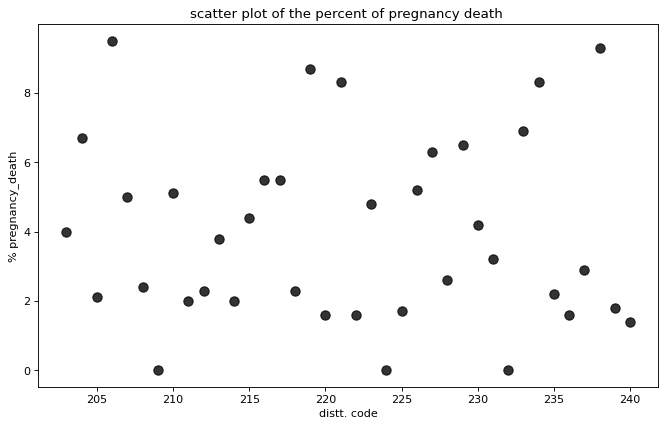

this graph show that more than half of the districts have pregnancy death is lower than 6% 
 which could be seen in the graph that more than half of the points lies below y=6


In [91]:
df_dap= pd.read_csv("district_data_dap.csv")
filt= df_dap['statename'] == 'Bihar'
df_dap_bihar=df_dap[filt]

list=['variable','graph_title','date','level_name', 'statename','state_code']
for i in list:
    del df_dap_bihar[i]

df_dap_bihar['districtname']=df_dap_bihar['districtname'].replace({'Saran': 'Saran (chhapra)','Kaimur (Bhabua)':'Kaimur (bhabua)'})


df_dap_bihar

plt.figure(figsize=(10, 6), dpi=80)
district_code=df_dap_bihar['district_code'].tolist()
value=df_dap_bihar['value'].tolist()
plt.scatter(district_code,value,s=70,color='black', alpha=0.8)
plt.title("scatter plot of the percent of pregnancy death ")
plt.xlabel("distt. code")
plt.ylabel("% pregnancy_death")
graph=plt.show()

print("this graph show that more than half of the districts have pregnancy death is lower than 6% \n which could be seen in the graph that more than half of the points lies below y=6")


finding which districts have more percentage of pregnancy death 
# using choropleth map to get info of each dist.

In [74]:

bihar_distt=json.load(open('Bihar_District.geojson','r'))
distt_id_map={}

for feature in bihar_distt['features']:
    feature['id']=feature['properties']['District']
    distt_id_map[feature['properties']['District']] = feature['id']
distt_id_map
df_dap_bihar['id']=df_dap_bihar['districtname'].apply(lambda x: distt_id_map[x])
df_dap_bihar

fig = px.choropleth(
    df_dap_bihar,
    locations="id",
    geojson=bihar_distt,
    color="value",
    hover_name="districtname",
    hover_data=["value"],
    title="Death during or after Pregnancy by Sector and District (percent, Source: NFHS)",
)
fig.update_geos(fitbounds="locations",visible=False)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(renderer="vscode")
print("hover over each districts to know its Name and the percentage of death due to pregnancy")


/tmp/ipykernel_2256/2945250447.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hover over each districts to know its Name and the percentage of death due to pregnancy


"the geographical map shows clearly that distt. Sitamarhi, Saran, Samastipur, Jamui, Rohtas are among the higher level of pregnancy deaths"

Now let's check what is the conditions of the medical facilities of these districts


# Availability of Medical Help (for Women) by Age and District (percent, Source: NFHS
dated: 1 jan,2015
data-obtained : https://cedadataportal.ashoka.edu.in/index.php

In [75]:
df_health= pd.read_csv("district_data_health_a.csv")
filt = df_health['statename'] =='Bihar'
df_health_bihar= df_health[filt]
list=['variable','graph_title','date','level_name', 'statename','state_code']
for i in list:
    del df_health_bihar[i]
# df_health_bihar


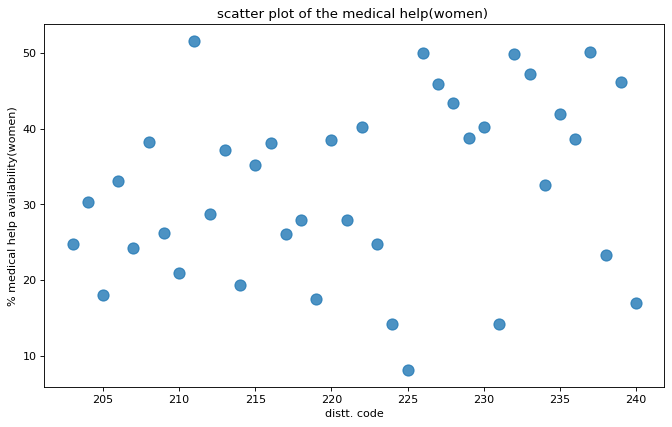

In [76]:
district_code=df_health_bihar['district_code'].tolist()
value=df_health_bihar['value'].tolist()
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(district_code,value,s=100, alpha=0.8)
plt.title("scatter plot of the medical help(women) ")
plt.xlabel("distt. code")
plt.ylabel("% medical help availability(women)")
graph=plt.show()

So the above scatter plot is giving the two scattered region, the first one, the district with distt_code from 205 to 225 seems to have medical help percent lower than 40, while the district with
distt_code 225 to 240 have medical help greater than 40%(mostly).

In [86]:
df_health_bihar['districtname']=df_health_bihar['districtname'].replace({'Saran': 'Saran (chhapra)','Kaimur (Bhabua)':'Kaimur (bhabua)'})

bihar_distt_h=json.load(open('Bihar_District.geojson','r'))
distt_id_map_h={}

for feature in bihar_distt_h['features']:
    feature['id']=feature['properties']['District']
    distt_id_map_h[feature['properties']['District']] = feature['id']
distt_id_map
df_health_bihar['id']=df_health_bihar['districtname'].apply(lambda x: distt_id_map_h[x])
df_health_bihar

#drawing the choropleth map

fig = px.choropleth(
    df_health_bihar,
    locations="id",
    geojson=bihar_distt_h,
    color="value",
    hover_name="districtname",
    hover_data=["value"],
    title="Death during or after Pregnancy by Sector and District (percent, Source: NFHS)",
)
fig.update_geos(fitbounds="locations",visible=False)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(renderer="vscode")
print("hover over each districts to know its Name and availability of medical help")


/tmp/ipykernel_2256/2579633421.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2256/2579633421.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hover over each districts to know its Name and availability of medical help


through this map we can clearly see that the Saran, Bhojpur, Banka are among the district which have least medical help(women)

# Finding relation between the medical help and the pregnancy death

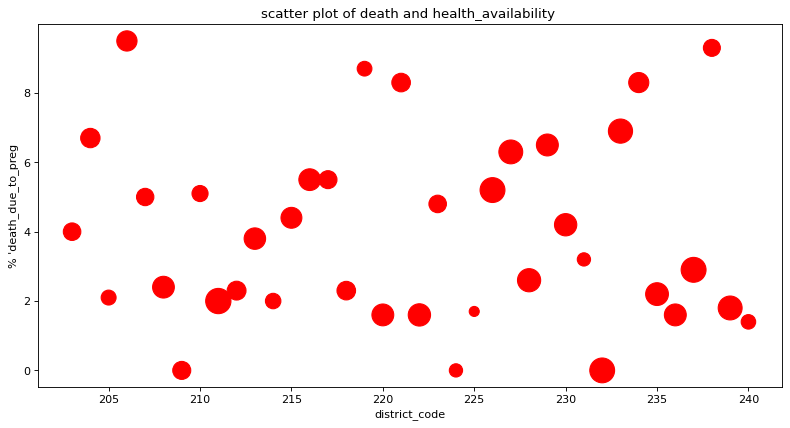

here the size of the dot is depends upon the medical availability to that particular district_code


In [87]:

bihar_pd_health= pd.merge(df_dap_bihar,df_health_bihar, how ='left', on =['district_code','districtname'])
bihar_pd_health

# relation between the medical help and the pregnancy death using health parameter at x -axis and the pregnancy death parameter at y axis

death_due_preg=bihar_pd_health['value_x']
medical_help= bihar_pd_health['value_y']


death_due_preg=death_due_preg.tolist()
medical_help = medical_help.tolist()
size = medical_help

my_new_size = []
for i in size:
    my_new_size.append(i * 10)


#drawing the scatter graph to show the relationship

plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(district_code,death_due_preg, s=my_new_size,color="Red", alpha=1)
plt.title("scatter plot of death and health_availability ")
plt.xlabel("district_code")
plt.ylabel("% 'death_due_to_preg")
graph=plt.show()
print("here the size of the dot is depends upon the medical availability to that particular district_code")


# Results

I found out that my hypothesis (inversally proportional) is incorrect. As the we can see the realtion graph of pregnancy death and health availability has no strong relations between each other.
